# Probability Weighted System using Cumulative Probabilities

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rich import print
PROB_CAP = 0.25
VRF_NUMBER = np.random.rand()
winner = None

In [113]:
''' 
    In this section I used raw probabilities of each bidders based on their price proposal bid.
    With Assume delta = 5 (instead of 5% in the question form)
'''
bids = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 120]
bids_data = {f"0x0{i}": bid for i, bid in enumerate(bids)}

raw_probs = [bid / sum(bids_data.values()) for bid in bids]

In [114]:
''' 
    I capped the probs to 25% as the requirements of the question form, and then distributed the collected capped
    amounts among the bids price less than 25%, to have a sumation of 1 in all capped probabilities.
'''
capped_probs = []
exceeded_probs, s_non_capped = 0, 0

for raw_prob in raw_probs:
    if raw_prob > PROB_CAP:
        capped_probs.append(PROB_CAP)
        exceeded_probs += raw_prob - PROB_CAP
    else:
        capped_probs.append(raw_prob)
        s_non_capped += raw_prob

In [115]:
# Redistributing capped probs
for idx, prob in enumerate(raw_probs):
    if prob <= PROB_CAP:
        capped_probs[idx] += (capped_probs[idx] / s_non_capped) * exceeded_probs

In [117]:
'''
    As a Verified Randomness Number (VRF) will select the winner based on the participants chance, I decided to use
    the common way called Cumulative Distribution Function or (CDF), this procedure works perfect and as it expected
    and I didn't research about other possible (or barely efficient) way for this. (simplicity ~ straightforward audit)
'''
cumulative_probs = np.cumsum(capped_probs)

In [118]:
for i, c_probs in enumerate(cumulative_probs):
    if VRF_NUMBER <= c_probs:
        winner = i + 1
        break

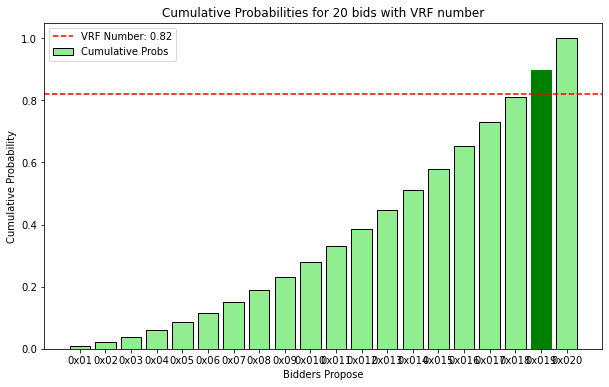

In [119]:
plt.figure(figsize=(10, 6))
sample_addr_labels = [f"0x0{i}" for i in range(1, 21)]
bars = plt.bar(range(1, 21), cumulative_probs, color='lightgreen', edgecolor='black', label='Cumulative Probs')
bars[winner - 1].set_color('green')
plt.axhline(y=VRF_NUMBER, color='red', linestyle='--', label=f'VRF Number: {VRF_NUMBER:.2f}')

plt.title('Cumulative Probabilities for 20 bids with VRF number')
plt.xlabel('Bidders Propose')
plt.ylabel('Cumulative Probability')
plt.xticks(range(1, 21), sample_addr_labels)
plt.legend()
plt.show()

$$S = \sum_{i=1}^{n} B_i  => P_i = \frac{B_i}{S}$$


$$P'_i = \min\left( P_i, 0.25 \right) =>  E_i = P_i - 0.25$$

$$E_{\text{total}} = \sum_{P_i > 0.25} (P_i - 0.25)$$

$$P'_j = P_j + \frac{P_j}{\sum_{P_i \leq 0.25} P_i} \times E_{\text{total}}$$

$$C_i = \sum_{j=1}^{i} P'_j$$

$$\exists i \in \{1, 2, \dots, n\} \text{ that } C_{i-1} \leq R < C_i, \text{ => } i \text{ wins.}$$